In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from KMeans import KMeans

%matplotlib inline

In [2]:
# FILE = "dandelion.jpg"
# FILE = "beach.jpg"
# FILE = "bird.jpg"
# FILE = "flowers.jpg"
# FILE = "sunrise.jpg"
FILE = "rose.jpg"
with Image.open(FILE) as im:
    im.load()

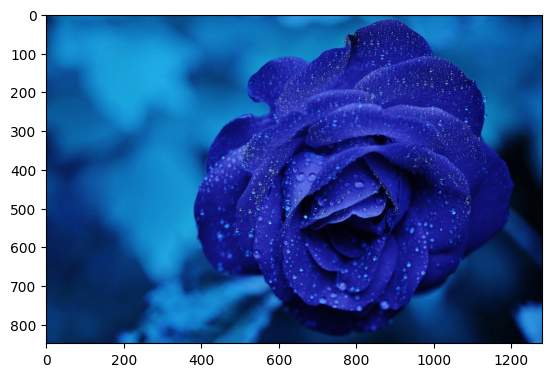

In [3]:
im = np.asarray(im)
orig_shape = im.shape
plt.imshow(im)

In [4]:
Image.fromarray(im.astype(np.uint8)).save(FILE+".png")
Image.fromarray(im.astype(np.uint8)).save(FILE+".jpg")

im = im / 255.
im_flat = np.reshape(im, (im.shape[0] * im.shape[1] , im.shape[2]))
im_flat.shape

(1085440, 3)

In [5]:
model = KMeans(im_flat, 4, 5)

In [6]:
centroids, centroid_idx = model.start(3)

K-Means Iteration:  1
 Iteration:  1
     Orphan Centroids:  0
d : 0.11011766521708514
     Distortion:  29881.529633309696
      (1085440,) (4, 3)
 Iteration:  2
     Orphan Centroids:  0
d : 0.10784999782622878
     Distortion:  29266.175410133288
      (1085440,) (4, 3)
 Iteration:  3
     Orphan Centroids:  0
d : 0.10688157846614418
     Distortion:  29003.385132582614
      (1085440,) (4, 3)
 Iteration:  4
     Orphan Centroids:  0
d : 0.10612367644262424
     Distortion:  28797.72083948027
      (1085440,) (4, 3)
 Iteration:  5
     Orphan Centroids:  0
d : 0.10563186375008116
     Distortion:  28664.26254720767
      (1085440,) (4, 3)
K-Means Iteration:  2
 Iteration:  1
     Orphan Centroids:  0
d : 0.1070220369949104
     Distortion:  29041.499958925957
      (1085440,) (4, 3)
 Iteration:  2
     Orphan Centroids:  0
d : 0.10442154125149058
     Distortion:  28335.829434021132
      (1085440,) (4, 3)
 Iteration:  3
     Orphan Centroids:  0
d : 0.10399329212838465
     Distort

In [16]:
X_recovered = centroids[centroid_idx, :]
X_recovered = X_recovered * 255
X_recovered = np.reshape(X_recovered, orig_shape)
X_recovered.shape

(848, 1280, 3)

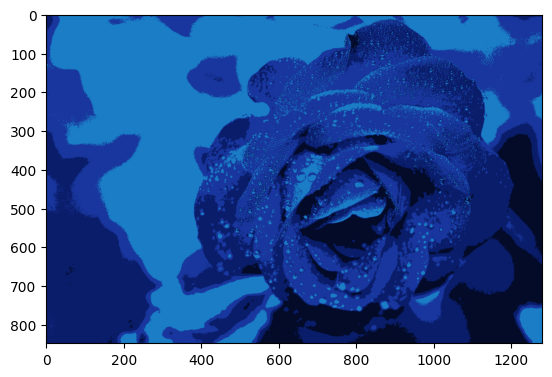

In [17]:
i = Image.fromarray(X_recovered.astype(np.uint8))
plt.imshow(i)

In [18]:
i.save("lol.png")